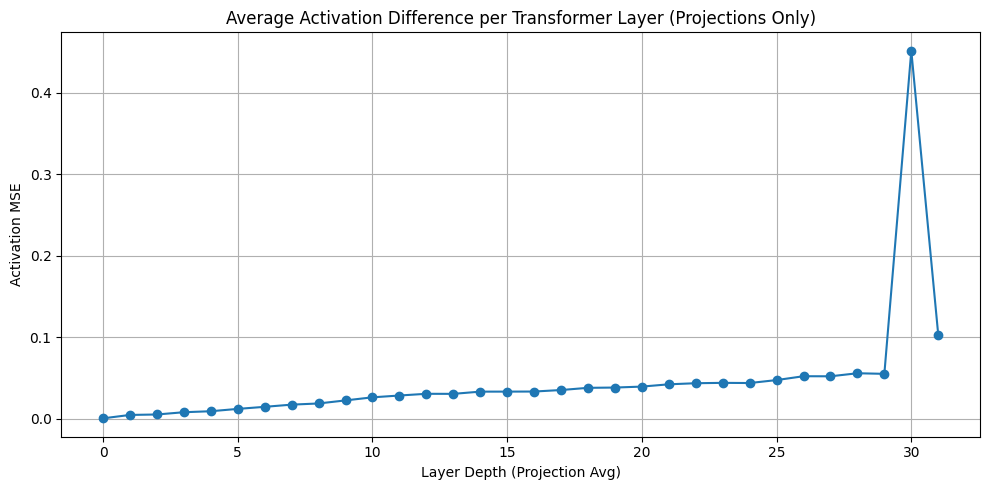

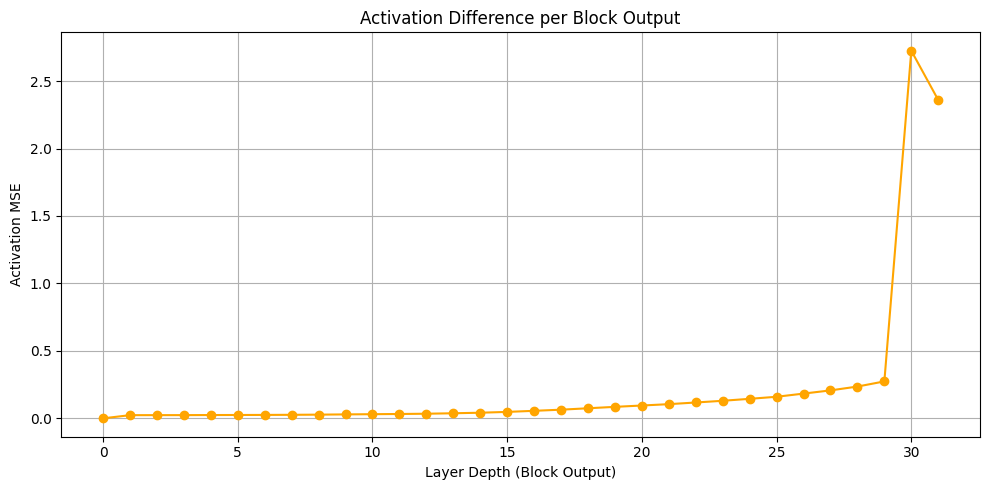

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Sample activation difference CSV paths (you can modify them)
file_path = "activation_diff_llama_fp_vs_loftq_4bit_init.csv"  # Replace with actual path

# Load CSV
df = pd.read_csv(file_path)

# Separate block-level and projection-level rows
is_block = df['layer'].str.startswith("block_")
df_block = df[is_block].copy()
df_proj = df[~is_block].copy()

# Extract layer number
df_proj['layer_num'] = df_proj['layer'].apply(lambda x: int(re.search(r"layers\.(\d+)", x).group(1)) if "layers." in x else -1)

# Group by layer and average mse
proj_avg = df_proj.groupby("layer_num")["mse"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(proj_avg['layer_num'], proj_avg['mse'], marker='o')
plt.xlabel("Layer Depth (Projection Avg)")
plt.ylabel("Activation MSE")
plt.title("Average Activation Difference per Transformer Layer (Projections Only)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Block-level plot
plt.figure(figsize=(10, 5))
df_block['layer_num'] = df_block['layer'].apply(lambda x: int(re.search(r"block_(\d+)", x).group(1)))
plt.plot(df_block['layer_num'], df_block['mse'], marker='o', color='orange')
plt.xlabel("Layer Depth (Block Output)")
plt.ylabel("Activation MSE")
plt.title("Activation Difference per Block Output")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
! pip install matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 53.6 MB/s eta 0:00:00


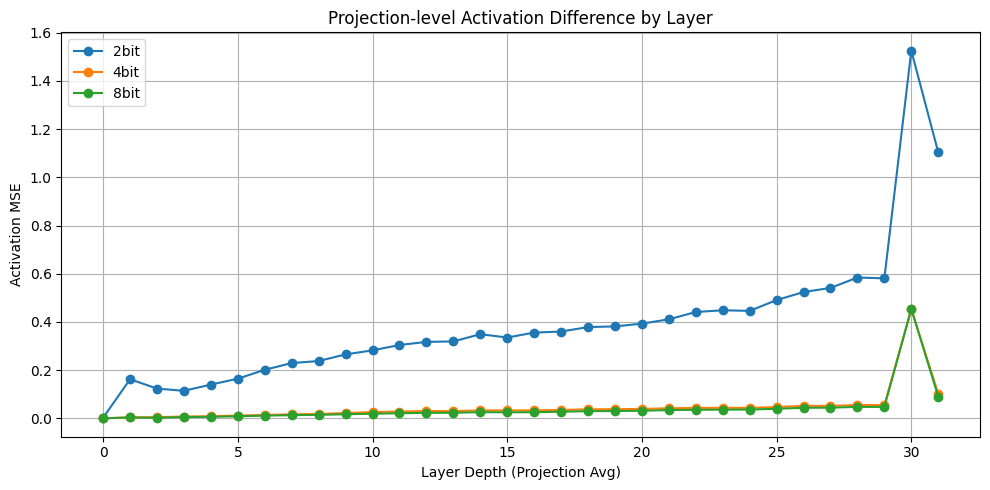

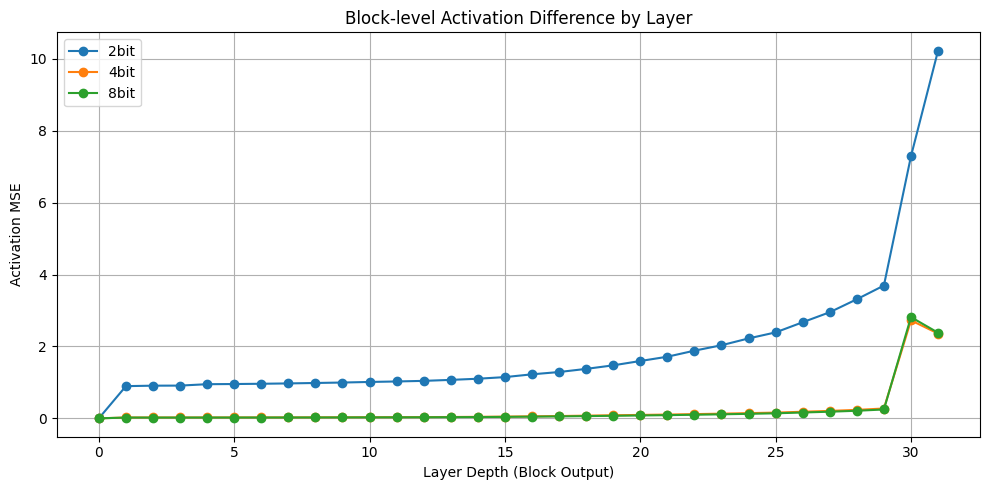

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# File paths for each bit version
files = {
    "2bit": "activation_diff_llama_fp_vs_loftq_2bit_init.csv",
    "4bit": "activation_diff_llama_fp_vs_loftq_4bit_init.csv",
    "8bit": "activation_diff_llama_fp_vs_loftq_8bit_init.csv"
}

# For projection plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_proj = df[~df['layer'].str.startswith("block_")].copy()
    df_proj['layer_num'] = df_proj['layer'].apply(
        lambda x: int(re.search(r"layers\.(\d+)", x).group(1)) if "layers." in x else -1
    )
    proj_avg = df_proj.groupby("layer_num")["mse"].mean().reset_index()
    plt.plot(proj_avg["layer_num"], proj_avg["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Projection Avg)")
plt.ylabel("Activation MSE")
plt.title("Projection-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For block-level plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_block = df[df['layer'].str.startswith("block_")].copy()
    df_block['layer_num'] = df_block['layer'].apply(
        lambda x: int(re.search(r"block_(\d+)", x).group(1))
    )
    plt.plot(df_block["layer_num"], df_block["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Block Output)")
plt.ylabel("Activation MSE")
plt.title("Block-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


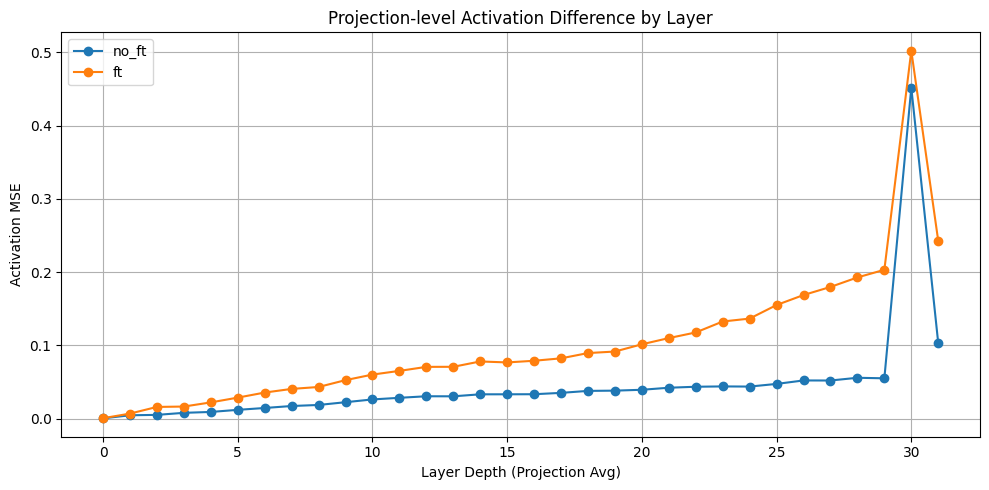

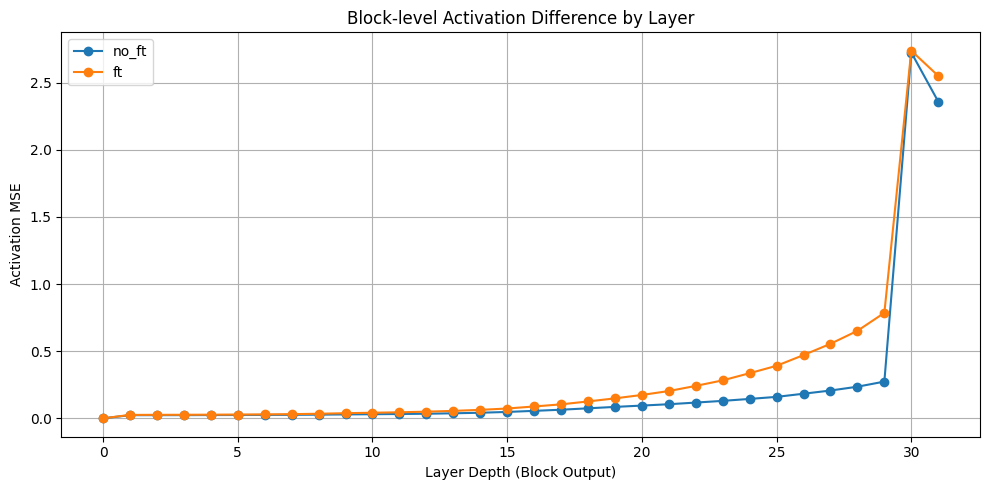

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# File paths for each bit version
files = {
    "no_ft": "activation_diff_llama_fp_vs_loftq_4bit_init.csv",
    "ft": "activation_diff_llama_fp_ft_vs_loftq_4bit_ft.csv"
}

# For projection plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_proj = df[~df['layer'].str.startswith("block_")].copy()
    df_proj['layer_num'] = df_proj['layer'].apply(
        lambda x: int(re.search(r"layers\.(\d+)", x).group(1)) if "layers." in x else -1
    )
    proj_avg = df_proj.groupby("layer_num")["mse"].mean().reset_index()
    plt.plot(proj_avg["layer_num"], proj_avg["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Projection Avg)")
plt.ylabel("Activation MSE")
plt.title("Projection-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For block-level plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_block = df[df['layer'].str.startswith("block_")].copy()
    df_block['layer_num'] = df_block['layer'].apply(
        lambda x: int(re.search(r"block_(\d+)", x).group(1))
    )
    plt.plot(df_block["layer_num"], df_block["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Block Output)")
plt.ylabel("Activation MSE")
plt.title("Block-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


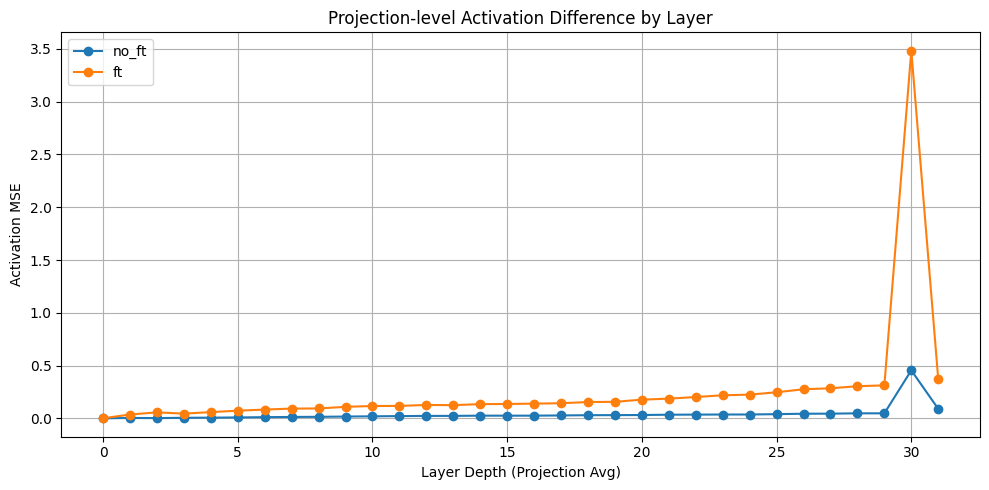

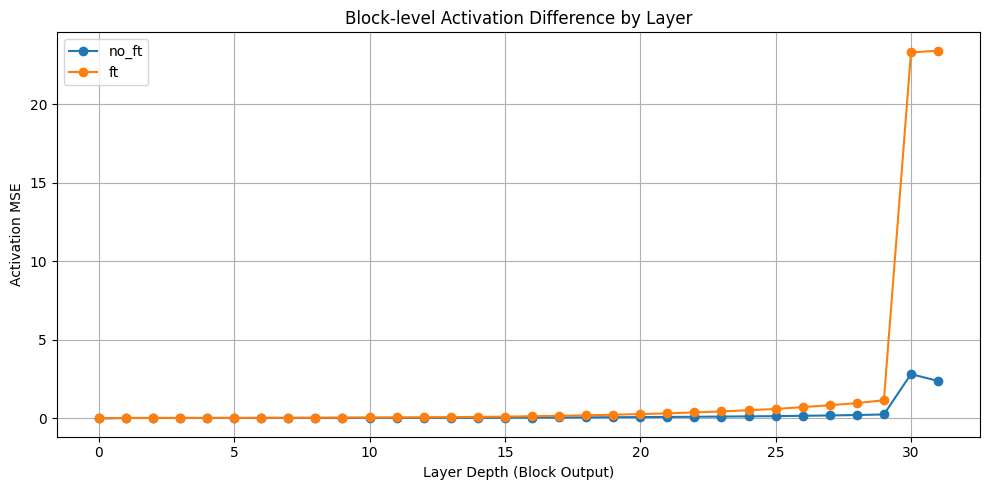

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# File paths for each bit version
files = {
    "no_ft": "activation_diff_llama_fp_vs_loftq_8bit_init.csv",
    "ft": "activation_diff_llama_fp_ft_vs_loftq_8bit_ft.csv"
}

# For projection plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_proj = df[~df['layer'].str.startswith("block_")].copy()
    df_proj['layer_num'] = df_proj['layer'].apply(
        lambda x: int(re.search(r"layers\.(\d+)", x).group(1)) if "layers." in x else -1
    )
    proj_avg = df_proj.groupby("layer_num")["mse"].mean().reset_index()
    plt.plot(proj_avg["layer_num"], proj_avg["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Projection Avg)")
plt.ylabel("Activation MSE")
plt.title("Projection-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For block-level plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_block = df[df['layer'].str.startswith("block_")].copy()
    df_block['layer_num'] = df_block['layer'].apply(
        lambda x: int(re.search(r"block_(\d+)", x).group(1))
    )
    plt.plot(df_block["layer_num"], df_block["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Block Output)")
plt.ylabel("Activation MSE")
plt.title("Block-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


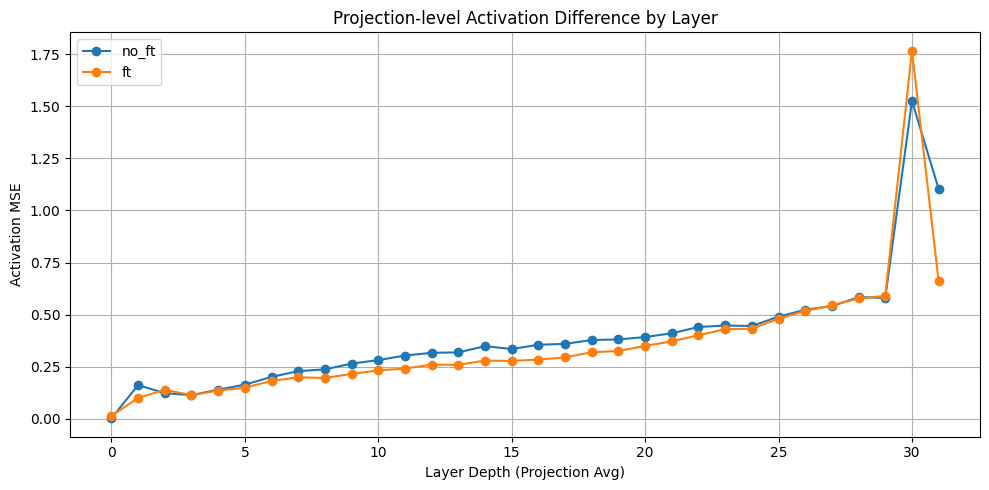

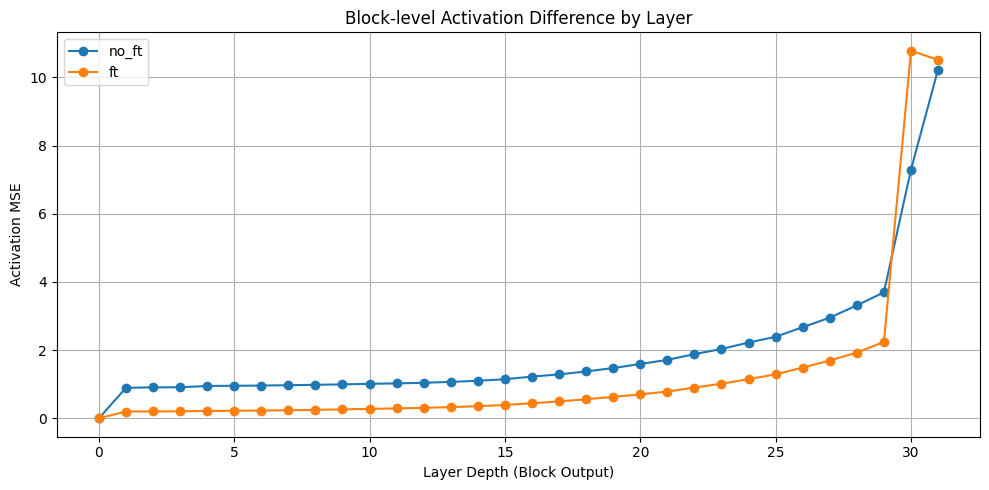

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# File paths for each bit version
files = {
    "no_ft": "activation_diff_llama_fp_vs_loftq_2bit_init.csv",
    "ft": "activation_diff_llama_fp_ft_vs_loftq_2bit_ft.csv"
}

# For projection plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_proj = df[~df['layer'].str.startswith("block_")].copy()
    df_proj['layer_num'] = df_proj['layer'].apply(
        lambda x: int(re.search(r"layers\.(\d+)", x).group(1)) if "layers." in x else -1
    )
    proj_avg = df_proj.groupby("layer_num")["mse"].mean().reset_index()
    plt.plot(proj_avg["layer_num"], proj_avg["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Projection Avg)")
plt.ylabel("Activation MSE")
plt.title("Projection-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For block-level plot
plt.figure(figsize=(10, 5))

for label, path in files.items():
    df = pd.read_csv(path)
    df_block = df[df['layer'].str.startswith("block_")].copy()
    df_block['layer_num'] = df_block['layer'].apply(
        lambda x: int(re.search(r"block_(\d+)", x).group(1))
    )
    plt.plot(df_block["layer_num"], df_block["mse"], marker='o', label=label)

plt.xlabel("Layer Depth (Block Output)")
plt.ylabel("Activation MSE")
plt.title("Block-level Activation Difference by Layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
